## Summary

**What problem is addressed in the notebook?**

How we can use *scipy* and *laughingrook* to solve problems involving **continuous random variables.**

**Is the problem solved in a single notebook?** \
*(If no, then where are the other notebooks?)*

Yes.

**Did you do anything novel in the notebook?** \
*(If yes, then what was the novel thing and should it be note for further use?)*

**Is there anything you have done for the first time?** \
*(If yes, then what do you show for the first time?)*

We defined a new class `oil_change_gen` to represent a continuous random variable.
(It inherits from `rv_continuous`.)
The benefits of inheriting from `rv_continuous` is that we gain access to a suite of useful statistical methods, so we do not have define them ourselves.

We also show off the use of *laughingrook's* `graphics` and `rvhelpers` modules, which contain contain convenient helper methods that can be used when working with *scipy's* random variables.

**References**

- M343 Book 1, *Probability and random variables*
- [SciPy, scipy.stats.rv_continuous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html)
- [LaughingRook](https://github.com/ljk233/LaughingRook.py)

## Dependencies

In [1]:
import pandas as pd                        # data structure
from scipy import stats as st              # data anslysis
from matplotlib import pyplot as plt       # plotting package
import seaborn as sns                      # advanced statistical visuals
from laughingrook import graphics as gfx   # convenience plotting functions
from laughingrook import rvhelpers as rvh  # convenience functions, scipy rv

In [2]:
%load_ext watermark
%watermark --iv

scipy       : 1.9.1
pandas      : 1.5.0
seaborn     : 0.12.0
matplotlib  : 3.6.0
laughingrook: 0.1.0



## Classes

:::{.callout-warning}
We override the `_pdf` when defining `oild_change_gen`, but M343 commonly gives the CDF.
:::

In [3]:
class oil_change_gen(st.rv_continuous):
    def _pdf(self, x):
        return x / 48

## Main

In [4]:
%precision 3
sns.set_theme()

### Initialise the random variable

We are modelling the time it takes to perform an oil change in a car.

:::{.callout-warning}
Arguments `a, b` refer to the min, max values of *X*.
If either are `(np.inf, -np.inf)`, then do not pass arguments for it.
:::

:::{.callout-tip}
Argument `name` is optional.
(Default is *Distribution*.)
It is called a few times by functions in `laughingrook.rvhelpers`.
:::

In [5]:
rv_oil_change = oil_change_gen(a=2, b=10, name='oil change')
xs = rvh.continuous_xs(rv_oil_change)  # event space

### Describe the random variable

In [6]:
rvh.describe(rv_oil_change)

mean    6.888889
var      4.54321
min            2
lq      5.291503
med     7.211103
uq      8.717798
max           10
Name: oil change, dtype: object

### Plot the random variable

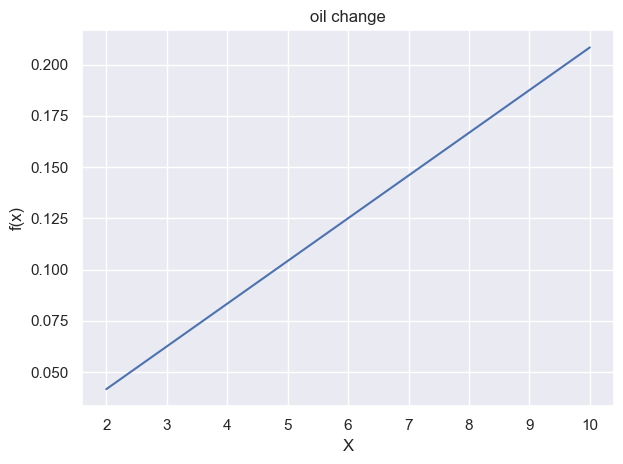

In [7]:
gfx.std_lineplot(xs, rv_oil_change.pdf(xs), rv_oil_change.name, 'X', 'f(x)')

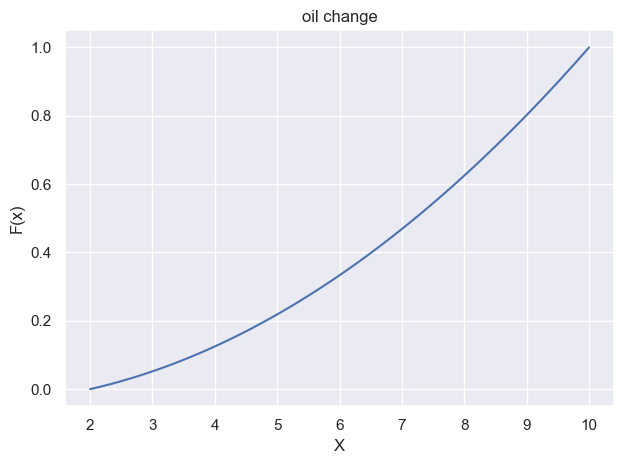

In [8]:
gfx.std_lineplot(xs, rv_oil_change.cdf(xs), rv_oil_change.name, 'X', 'F(x)')

### Calculating probabilities

In [9]:
rv_oil_change.pdf(6)  # P(6)

0.125

In [10]:
rv_oil_change.cdf(6)  # F(6)

0.333

In [11]:
rv_oil_change.sf(6)   # P(X>6) == 1 - F(6)

0.667

### Calculating quantiles

In [12]:
rv_oil_change.ppf(0.5)       # could use rv.median()

7.211

In [13]:
rv_oil_change.interval(0.8)  # lower, upper deciles

(3.688, 9.508)

In [14]:
rvh.iqr(rv_oil_change)       # interquartile range

3.426

### Expectation and variance

In [15]:
rvh.describe(rv_oil_change)

mean    6.888889
var      4.54321
min            2
lq      5.291503
med     7.211103
uq      8.717798
max           10
Name: oil change, dtype: object

In [16]:
rv_oil_change.mean()  # E(X)

6.889

In [17]:
rv_oil_change.var()   # V(X)

4.543

### Sampling the distribution

In [18]:
rv_oil_change.rvs(size=9)  # sample the distribution

array([7.087, 5.509, 2.588, 7.958, 4.206, 5.092, 9.71 , 9.657, 8.248])

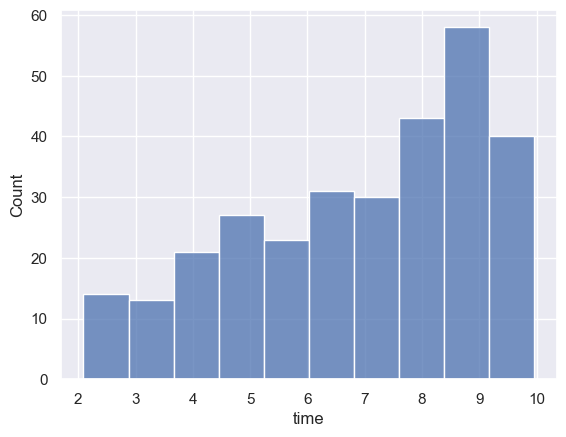

In [19]:
# plot histogram of sampled values
sns.histplot(data=rv_oil_change.rvs(size=300))
plt.xlabel('time')
plt.show()